In [2]:
from importlib import reload

import numpy as np

import matplotlib.pyplot as plt

import astropy
import astropy.units as u

import lightkurve as lk
import lightkurve_ext as lke

%matplotlib inline

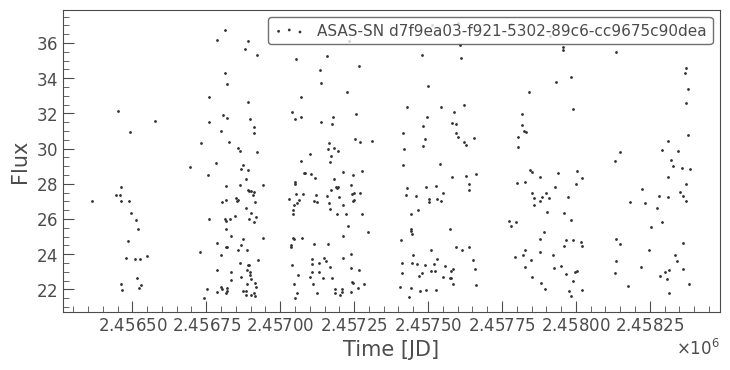

In [3]:
lc = lke.read_asas_sn_csv(asas_sn_uuid="d7f9ea03-f921-5302-89c6-cc9675c90dea")
lc.scatter();

0.41321808992219583 d 1.161934247228135
0.5538385373774614 d 1.0762643153166387
0.20660583614940967 d 1.038426874211024
0.23664801514680264 d 1.031605128786014
0.3820883912861061 d 1.0223882927956232


[LombScarglePeriodogram(ID: ASAS-SN d7f9ea03-f921-5302-89c6-cc9675c90dea),
 LombScarglePeriodogram(ID: residual after period=0.41321808992219583 d),
 LombScarglePeriodogram(ID: residual after period=0.5538385373774614 d),
 LombScarglePeriodogram(ID: residual after period=0.20660583614940967 d),
 LombScarglePeriodogram(ID: residual after period=0.23664801514680264 d)]

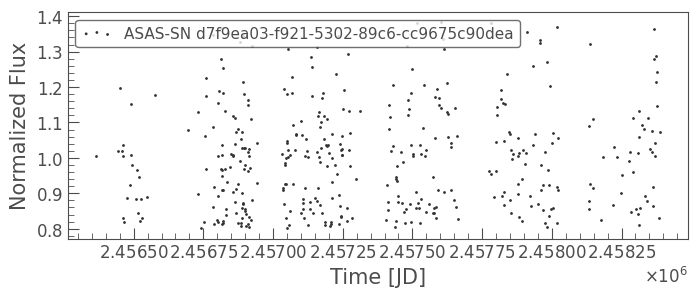

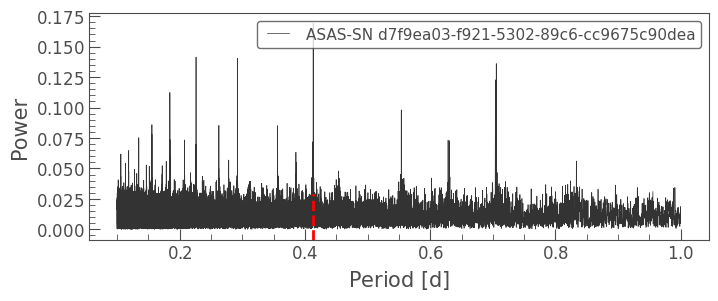

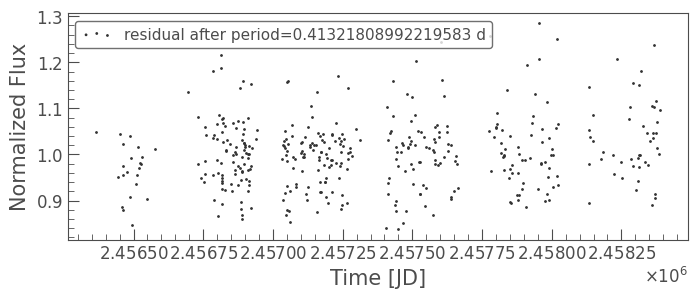

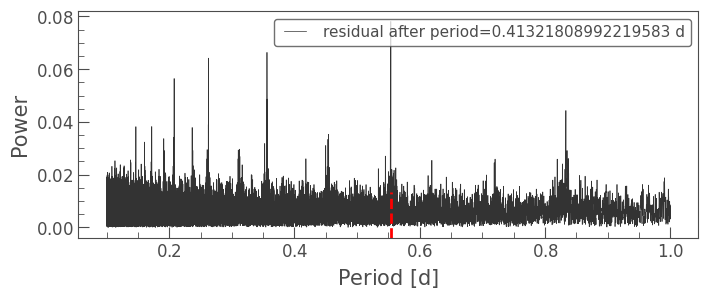

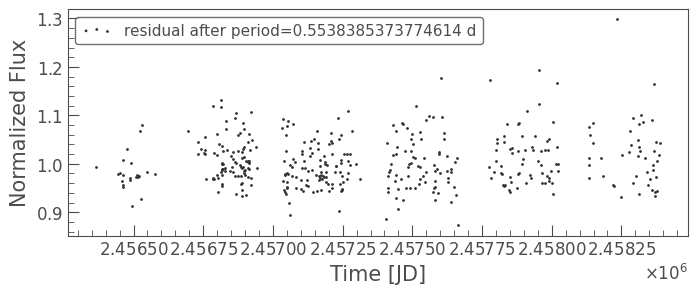

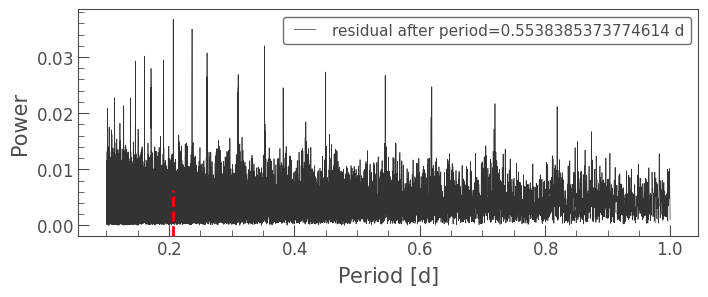

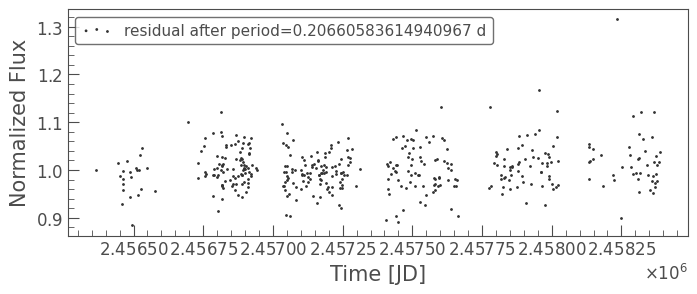

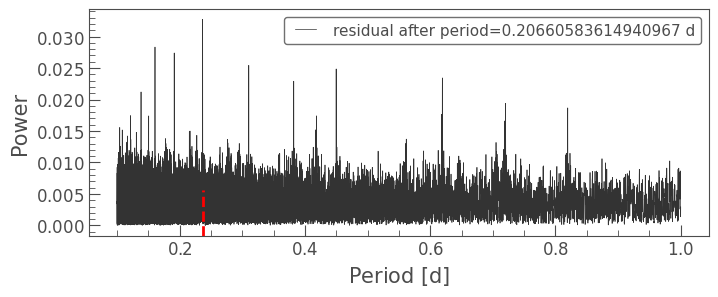

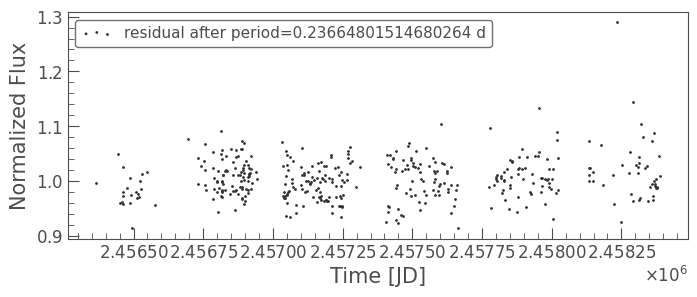

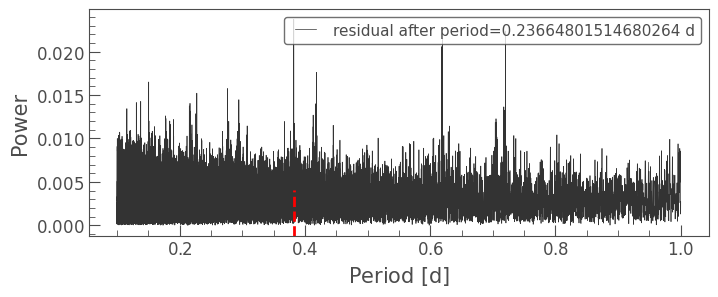

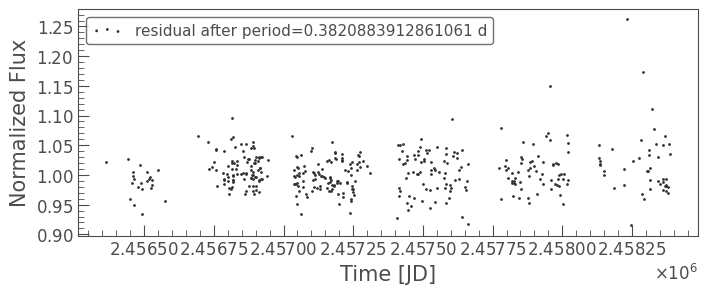

In [40]:
def find_frequency_components(lc, num_iterations=2, **pg_kwargs):
    # Use iterative sine fitting to remove frequency components
    
    def _new_ax():
        with plt.style.context(lk.MPLSTYLE):
            return plt.figure(figsize=(8, 3)).gca()

        
    def _calc_n_plot_next_frequency(lc_cur, **pg_kwargs):
        pg = lc_cur.to_periodogram(method='lombscargle', **pg_kwargs)
        lc_model = pg.model(lc_cur.time)
        lc_model.label = f"Model, period={pg.period_at_max_power}"
        lc_residual = lc_cur / lc_model  # unsure why division is used to calc residual
        lc_residual.label = f"residual after period={pg.period_at_max_power}"
        return pg, lc_model, lc_residual

    
    lc = lc.normalize()
    
    lc.scatter(ax=_new_ax())
    
    lc_cur = lc
    pg_list = []
    for n in range(0, num_iterations):
        pg, lc_model, lc_residual = _calc_n_plot_next_frequency(lc_cur, **pg_kwargs)
        
        # period - amplitude
        print(pg.period_at_max_power, lc_model.flux.max())
#         lc_model.scatter(ax=_new_ax())
#         lc_model.fold(period=pg.period_at_max_power).scatter(ax=_new_ax())
        ax = pg.plot(view="period", ax=_new_ax())
        ax.axvline(pg.period_at_max_power.value, linestyle="--", ymax=0.2, linewidth=2, c="red", label="period at max power")
        lc_residual.scatter(ax=_new_ax())
        
        lc_cur = lc_residual
        pg_list.append(pg)
        
    return pg_list
    

pg_list = find_frequency_components(lc, num_iterations=5, minimum_period=0.1, maximum_period=1)
pg_list